In [9]:
# extract information from dump file.
import numpy as num
import matplotlib.pyplot as plt
import pylab as lab
from scipy import constants
import scipy as sci
import pandas as pan
import os
%matplotlib inline

In [10]:
def DumpExtractor(filename,frames,PtatomNumber,OatomNumber):
    
    """
    infoDict=DumpExtractor(filename,frames,atomNumber,atomPlate)


    Function that extracts the information from the .dump file created by openmd
    
    
        Inputs:
      ===========
   
   
       filename:
   
               Path of the dump file from which the information is to be extracted
               
        frame:
    
                Total number of frames in the dump file
                
        atomNumber:
        
                Totla number of atoms in the slab or crystal
                
        atomPlate:
    
                Total number of atoms in the capacitor plates



        Outputs:
     =============
 
     infoDict:
 
         Dictonary containing position, velocity, chargeQV, electricField, plateEQV.
         Postion is a list of [x,y,z] and each x,y,z are array of x[frames][sites]
         velocity is a list of [vx,vy,vz] and each vx,vy,vz are array of vx[frames][sites]
         chargeQV is a lisf of [c,cv] and each c and cv are array of c[frame][sites]
         electric field is list of [ex,ey,ez] and each are array of ex[frame][sites]
         plateEQV is the list of [pex,pey,pez,pc,pcv] and each are array of pex[frames][sites]
    """
    
    fileDump=open(filename)  #dump file for info extraction
    linesDump=fileDump.readlines()

    processP="Wait"
    processC="Wait"


    #information storage matrix 
    #posiiton and velocity storage
    xPt=num.zeros((frames,PtatomNumber))
    yPt=num.zeros((frames,PtatomNumber))
    zPt=num.zeros((frames,PtatomNumber))
    vxPt=num.zeros((frames,PtatomNumber))
    vyPt=num.zeros((frames,PtatomNumber))
    vzPt=num.zeros((frames,PtatomNumber))


    #charge and velocity storage matrix
    cPt=num.zeros((frames,PtatomNumber))
    cvPt=num.zeros((frames,PtatomNumber))
    exPt=num.zeros((frames,PtatomNumber))
    eyPt=num.zeros((frames,PtatomNumber))
    ezPt=num.zeros((frames,PtatomNumber))
    
                  
    #posiiton and velocity storage
    xO=num.zeros((frames,OatomNumber))
    yO=num.zeros((frames,OatomNumber))
    zO=num.zeros((frames,OatomNumber))
    vxO=num.zeros((frames,OatomNumber))
    vyO=num.zeros((frames,OatomNumber))
    vzO=num.zeros((frames,OatomNumber))


    #charge and velocity storage matrix
    cO=num.zeros((frames,OatomNumber))
    cvO=num.zeros((frames,OatomNumber))
    exO=num.zeros((frames,OatomNumber))
    eyO=num.zeros((frames,OatomNumber))
    ezO=num.zeros((frames,OatomNumber))
   
    #frame count initilization
    fCount=0
    index=0  #index for the atoms
    for line in linesDump:
        linesSplit=str.split(line)
        length=len(linesSplit)
    
        if(length!=0 and linesSplit[0]=="<StuntDoubles>" and processP=="Wait"):
            processP="Start"
            continue;
        
        elif(length!=0 and linesSplit[0]=="</StuntDoubles>" and processP=="Start"):
            processP="Wait"
            index=0
            continue;
        
        elif(length!=0 and linesSplit[0]=="<SiteData>" and processC=="Wait"):
            processC="Start"
            continue;
        
        elif(length!=0 and linesSplit[0]=="</SiteData>" and processC=="Start"):
            fCount=fCount+1
            index=0;
            processC="Wait"
            continue;
   
        elif(fCount>=frames):
            break;
        
        else:
            processP=processP;
            processC=processC;
        
        
        if (processP=="Start"):
            if int(linesSplit[0])<PtatomNumber:
                xPt[fCount][int(linesSplit[0])]=float(linesSplit[2])
                yPt[fCount][int(linesSplit[0])]=float(linesSplit[3])
                zPt[fCount][int(linesSplit[0])]=float(linesSplit[4])
                vxPt[fCount][int(linesSplit[0])]=float(linesSplit[5])
                vyPt[fCount][int(linesSplit[0])]=float(linesSplit[6])
                vzPt[fCount][int(linesSplit[0])]=float(linesSplit[7])
            else:
                xO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[2])
                yO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[3])
                zO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[4])
                vxO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[5])
                vyO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[6])
                vzO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[7]) 
        
        if(processC=="Start"):
            if int(linesSplit[0])<PtatomNumber:
                cPt[fCount][int(linesSplit[0])]=float(linesSplit[3])
                cvPt[fCount][int(linesSplit[0])]=float(linesSplit[4])
                exPt[fCount][int(linesSplit[0])]=float(linesSplit[5])
                eyPt[fCount][int(linesSplit[0])]=float(linesSplit[6])
                ezPt[fCount][int(linesSplit[0])]=float(linesSplit[7])
            else:
                cO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[3])
                cvO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[4])
                exO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[5])
                eyO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[6])
                ezO[fCount][int(linesSplit[0])-PtatomNumber]=float(linesSplit[7])
            
        
    positionPt=[xPt,yPt,zPt]
    velocityPt=[vxPt,vyPt,vzPt]
    chargeQVPt=[cPt,cvPt]
    electricFieldPt=[exPt,eyPt,ezPt]
                 
    positionO=[xO,yO,zO]
    velocityO=[vxO,vyO,vzO]
    chargeQVO=[cO,cvO]
    electricFieldO=[exO,eyO,ezO]
   
    
    infoDict={"positionPt":positionPt,"velocityPt":velocityPt,"chargeQVPt":chargeQVPt,\
              "electricFieldPt":electricFieldPt,"positionO":positionO,"velocityO":velocityO\
              ,"chargeQVO":chargeQVO,\
              "electricFieldO":electricFieldO}
    return infoDict



"""Function that determines different layers in a crystal

[layer,a]= Layers(ZPosition,atomNumber)
 
  Input:
 ========
 
         ZPosition: Z Coordinates of lattice for layer determination
         
         atomNumber: total Number of atoms in crystal
         
         
  Output:
 =========
         list [layer,a]; layer has index for atoms in each layers and "a" has the z-coordinates for each layers
         
         
"""
def Layers(ZPosition,atomNumber):
    a=num.sort(list(set(ZPosition[0,0:atomNumber-1])))
    layer=[]
    for var in a:
        layer.append(num.where(ZPosition[0]==var))
    
    return [layer,a]



In [32]:
file="/home/hbhattar/afs/Hemanta/metals/PtOxygenAdatom/Pt5OadAtom.dump"
PtatomNumber=432
OatomNumber=5
frames=100
dump=DumpExtractor(file,frames,PtatomNumber,OatomNumber)


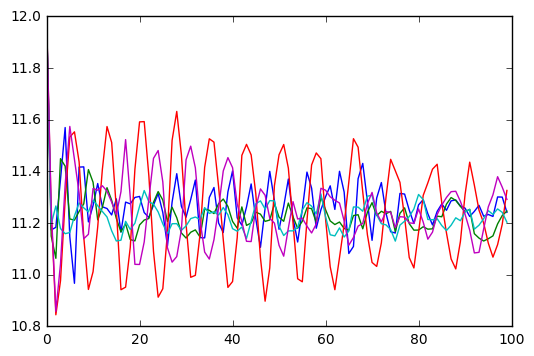

In [33]:
lab.plot(dump["positionO"][2])

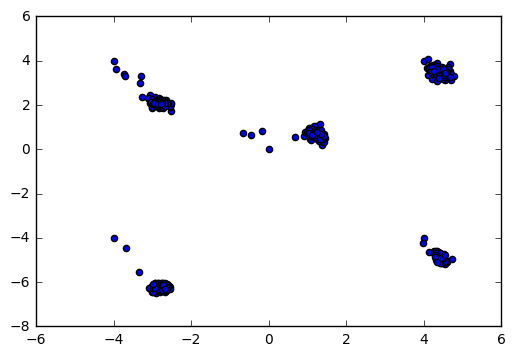

In [34]:
lab.scatter(dump["positionO"][0],dump["positionO"][1])

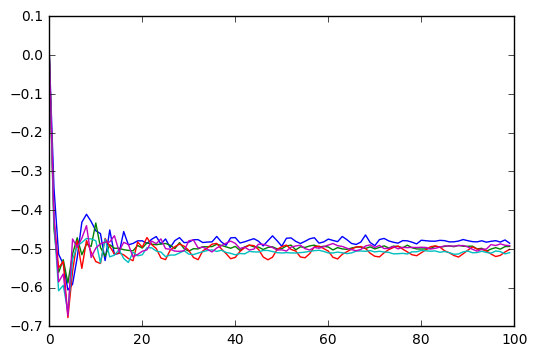

In [35]:
lab.plot(dump["chargeQVO"][0])
lab.show()

In [36]:
#PtLayers
layers,a=Layers(dump["positionPt"][2],PtatomNumber)
layers

[(array([  0,   1,   3,   4,   5,   7,   8,   9,  10,  18,  19,  20,  30,
          31,  32,  34,  35,  36,  37,  45,  46,  47,  48,  61,  62,  63,
          64,  84, 102, 103, 104, 105, 106, 114, 115, 116, 117, 130, 131,
         132, 133, 153, 216, 220, 221, 222, 223, 243]),),
 (array([  2,   6,  11,  12,  13,  14,  21,  22,  23,  33,  38,  39,  40,
          41,  49,  50,  51,  52,  65,  66,  67,  68,  85,  86, 107, 108,
         109, 110, 118, 119, 120, 121, 134, 135, 136, 137, 154, 155, 156,
         217, 224, 225, 226, 227, 244, 245, 246, 330]),),
 (array([ 15,  16,  17,  24,  25,  26,  42,  43,  44,  53,  54,  55,  56,
          69,  70,  71,  72,  87,  88,  89, 111, 112, 113, 122, 123, 124,
         125, 138, 139, 140, 141, 157, 158, 159, 160, 177, 218, 228, 229,
         230, 231, 247, 248, 249, 250, 267, 331, 336]),),
 (array([ 27,  28,  57,  58,  59,  73,  74,  75,  76,  90,  91,  92, 126,
         127, 128, 142, 143, 144, 145, 161, 162, 163, 164, 178, 179, 180,
         181

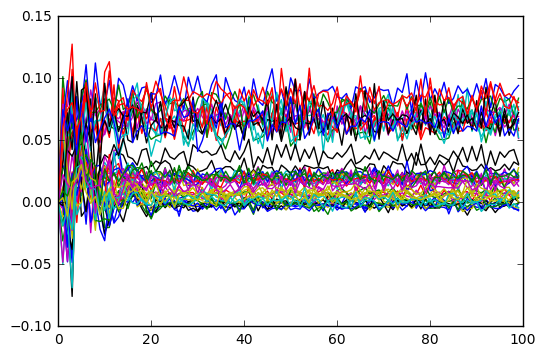

In [37]:
lab.plot(dump["chargeQVPt"][0][:,layers[8][0]])
lab.show()

TypeError: You must first set_array for mappable

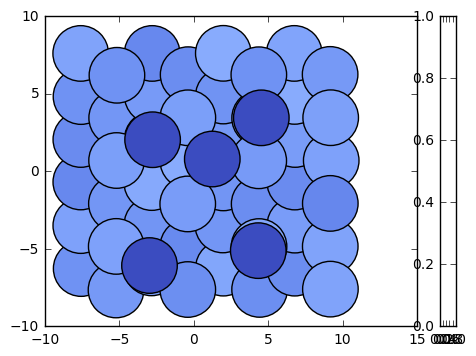

In [38]:
usedframe=99
chargePt=dump["chargeQVPt"][0][usedframe,:]
scaled_c = (chargePt - chargePt.min()) / chargePt.ptp()
colors = plt.cm.coolwarm(scaled_c)


chargeO=dump["chargeQVO"][0][usedframe,:]
scaled_cO = (chargeO - chargePt.min()) / chargePt.ptp()
colorsO = plt.cm.coolwarm(scaled_cO)
#first=lab.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
lab.scatter(dump["positionPt"][0][usedframe,layers[0][0]],dump["positionPt"][1][usedframe][layers[0][0]]\
            ,c=colors,s=1600,cmap='jet')

lab.scatter(dump["positionO"][0][usedframe],dump["positionO"][1][usedframe],c=colorsO,s=1600,cmap='jet')
lab.colorbar()
lab.axes().set_aspect("equal","datalim")
lab.axes().set_title("plot")
lab.axes().set_ylabel("Y")
lab.axes().set_xlabel("X")
lab.show()

In [22]:
chargePt

array([ -5.50151900e-03,  -5.98049500e-03,   8.87749900e-04,
        -4.77208800e-03,   1.07255700e-03,  -1.76017800e-03,
        -4.65593600e-03,  -3.30430800e-03,  -7.36965200e-03,
         1.36277100e-03,   3.92717800e-04,   5.92968800e-03,
        -2.02912800e-03,   4.57063200e-04,  -4.34585600e-03,
         3.45855100e-03,   7.53591900e-03,   2.85762700e-04,
        -1.63725100e-03,  -7.10734700e-03,  -4.30279000e-03,
        -3.35586900e-03,   5.63585900e-05,  -3.83821400e-03,
        -1.54243500e-03,   4.58653600e-03,   6.43015300e-03,
         6.52704000e-03,   9.49109700e-04,   4.36916500e-03,
         1.34965500e-03,   2.02023200e-03,  -5.54361500e-03,
        -2.06050300e-03,  -1.74074600e-03,  -2.17969600e-03,
        -5.77070000e-03,  -2.13763300e-03,  -1.79015800e-03,
         4.68398400e-03,  -4.81234900e-03,  -2.23824800e-03,
         3.86743300e-03,   1.33398900e-04,   7.56291600e-03,
         3.24223900e-03,  -1.35188700e-03,  -1.01861200e-02,
        -4.64757300e-03,

In [110]:
help(plt.axes)

Help on function axes in module matplotlib.pyplot:

axes(*args, **kwargs)
    Add an axes to the figure.
    
    The axes is added at position *rect* specified by:
    
    - ``axes()`` by itself creates a default full ``subplot(111)`` window axis.
    
    - ``axes(rect, axisbg='w')`` where *rect* = [left, bottom, width,
      height] in normalized (0, 1) units.  *axisbg* is the background
      color for the axis, default white.
    
    - ``axes(h)`` where *h* is an axes instance makes *h* the current
      axis.  An :class:`~matplotlib.axes.Axes` instance is returned.
    
    =======   ==============   ==============================================
    kwarg     Accepts          Description
    =======   ==============   ==============================================
    axisbg    color            the axes background color
    frameon   [True|False]     display the frame?
    sharex    otherax          current axes shares xaxis attribute
                               with othera